In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [89]:
# df = pd.read_csv('cardio_alco.csv')
# df.head()

In [90]:
df1 = pd.read_csv('cardio_base.csv')
df1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [91]:
df2 = pd.read_csv('covid_data.csv')
df2.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [92]:
# Group by 'gender' and count the occurrences of each value in the 'smoke' column
smoke_counts = df1.groupby('gender')['smoke'].value_counts()

# Extract the counts for smokers 
smoker_counts = smoke_counts[:, 1]

# Print the result
print("Number of smokers by gender:")
print(smoker_counts)

Number of smokers by gender:
gender
1     813
2    5356
Name: smoke, dtype: int64


In [93]:
# Calculate the percentage threshold for the tallest individuals you want to include
percentage_threshold = 1  # Change this value to your desired percentage (e.g., 1 for the top 1%)

# Calculate the cutoff weight based on the specified percentage
cutoff_weight = df1['weight'].quantile(1 - percentage_threshold / 100)

# Filter the dataframe to include only individuals with weight above the cutoff
tallest_people = df1[df1['weight'] > cutoff_weight]

# Display the resulting dataframe
print(tallest_people)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke
338      474  21078       1     157   142.0    120     80            1      0
389      552  16718       2     165   169.0    120     80            1      0
435      618  16765       1     186   200.0    130     70            1      0
446      634  21237       2     178   120.0    160     90            1      0
591      846  14705       1     164   125.0    130     90            1      0
...      ...    ...     ...     ...     ...    ...    ...          ...    ...
69012  98584  18317       1     170   123.0    130     90            1      0
69060  98640  18924       1     163   119.0    160     90            1      0
69109  98709  19077       2     175   155.0    110    100            1      0
69440  99182  23141       2     180   123.0    190     99            2      0
69996  99995  22601       1     158   126.0    140     90            2      0

[691 rows x 9 columns]


In [94]:
# Calculate the Spearman rank correlation matrix for all numeric columns
spearman_corr_matrix = df1.corr(method='spearman')

# Get the highest Spearman rank correlation (excluding self-correlations)
max_corr = spearman_corr_matrix.stack().sort_values(ascending=False).iloc[1]

# Find the pair of variables with the highest correlation
max_corr_pair_index = spearman_corr_matrix.stack().idxmax()
max_corr_pair = (max_corr_pair_index[0], max_corr_pair_index[1])

# Display the results
print(f"Highest Spearman rank correlation: {max_corr:.3f}")
print(f"Variables with the highest correlation: {max_corr_pair}")

Highest Spearman rank correlation: 1.000
Variables with the highest correlation: ('id', 'id')


In [95]:
# Calculate the mean and standard deviation of the 'height' column
mean_height = df1['height'].mean()
std_dev_height = df1['height'].std()

# Define the threshold for being more than 2 standard deviations away
threshold = 2

# Count the number of people who are more than 2 standard deviations away from the mean height
outliers_count = df1[(df1['height'] > mean_height + threshold * std_dev_height) | 
                    (df1['height'] < mean_height - threshold * std_dev_height)].shape[0]

# Calculate the percentage of outliers
percentage_outliers = (outliers_count / df1.shape[0]) * 100

print(f"Percentage of people more than 2 standard deviations away from average height: {percentage_outliers:.2f}%")

Percentage of people more than 2 standard deviations away from average height: 3.34%


In [96]:
print("Columns in df_base:", df_base.columns)
print("Columns in df_alco:", df_alco.columns)


Columns in df_base: Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke'],
      dtype='object')
Columns in df_alco: Index(['id', 'alco'], dtype='object')


In [97]:


# Assuming 'cardio_base.csv' contains demographic information and 'Cardio_alco.csv' contains alcohol consumption information
df_base = pd.read_csv('cardio_base.csv')
df_alco = pd.read_csv('Cardio_alco.csv', sep=';')  # Specify the separator as ';'

# Merge datasets on 'id'
merged_df = pd.merge(df_base, df_alco, left_on='id', right_on='id', how='inner')

# Convert 'alco' column to numeric (assuming it contains numerical values)
merged_df['alco'] = pd.to_numeric(merged_df['alco'], errors='coerce')

# Filter individuals over 50 years old
over_50_df = merged_df[merged_df['age'] > 50]

# Calculate the percentage of individuals over 50 who consume alcohol
total_over_50 = over_50_df.shape[0]
alcohol_consumers_over_50 = over_50_df[over_50_df['alco'] == 1].shape[0]
percentage_consumers_over_50 = (alcohol_consumers_over_50 / total_over_50) * 100

print(f"Percentage of population over 50 consuming alcohol: {percentage_consumers_over_50:.2f}%")


Percentage of population over 50 consuming alcohol: 5.34%


In [98]:
# Assuming 'cardio_base.csv' contains the relevant information
df = pd.read_csv('cardio_base.csv')

# Check if men have higher blood pressure than women
average_bp_men = df[df['gender'] == 2]['ap_hi'].mean()
average_bp_women = df[df['gender'] == 1]['ap_hi'].mean()

if average_bp_men > average_bp_women:
    print("Men have higher average blood pressure than women.")
else:
    print("Women have higher or equal average blood pressure than men.")

# Compare blood pressure, weight, and cholesterol levels between smokers and non-smokers
smokers = df[df['smoke'] == 1]
non_smokers = df[df['smoke'] == 0]

# Blood pressure comparison
average_bp_smokers = smokers['ap_hi'].mean()
average_bp_non_smokers = non_smokers['ap_hi'].mean()
print(f"Average blood pressure for smokers: {average_bp_smokers}")
print(f"Average blood pressure for non-smokers: {average_bp_non_smokers}")

# Weight comparison
average_weight_smokers = smokers['weight'].mean()
average_weight_non_smokers = non_smokers['weight'].mean()
print(f"Average weight for smokers: {average_weight_smokers}")
print(f"Average weight for non-smokers: {average_weight_non_smokers}")

# Cholesterol level comparison
average_cholesterol_smokers = smokers['cholesterol'].mean()
average_cholesterol_non_smokers = non_smokers['cholesterol'].mean()
print(f"Average cholesterol level for smokers: {average_cholesterol_smokers}")
print(f"Average cholesterol level for non-smokers: {average_cholesterol_non_smokers}")


Men have higher average blood pressure than women.
Average blood pressure for smokers: 128.36051223861242
Average blood pressure for non-smokers: 128.86143096614498
Average weight for smokers: 77.34435078618901
Average weight for non-smokers: 73.90235152198775
Average cholesterol level for smokers: 1.3895282865942615
Average cholesterol level for non-smokers: 1.3646817377136502


In [99]:
# Filter data for Italy and Germany
italy_data = df2[df2['location'] == 'Italy']
germany_data = df2[df2['location'] == 'Germany']

# Merge the dataframes on the 'date' column
merged_data = pd.merge(italy_data, germany_data, on='date', suffixes=('_italy', '_germany'))

# Calculate the difference in new cases
merged_data['new_cases_difference'] = merged_data['new_cases_italy'] - merged_data['new_cases_germany']

# Find the date when the difference exceeded 1,000 new cases
date_threshold_exceeded = merged_data.loc[merged_data['new_cases_difference'] > 1000, 'date'].min()

print(f"The date when the difference exceeded 1,000 new cases: {date_threshold_exceeded}")

The date when the difference exceeded 1,000 new cases: 2020-03-08


In [100]:

print(df2.columns)

Index(['location', 'date', 'new_cases', 'new_deaths', 'population',
       'aged_65_older_percent', 'gdp_per_capita',
       'hospital_beds_per_thousand'],
      dtype='object')


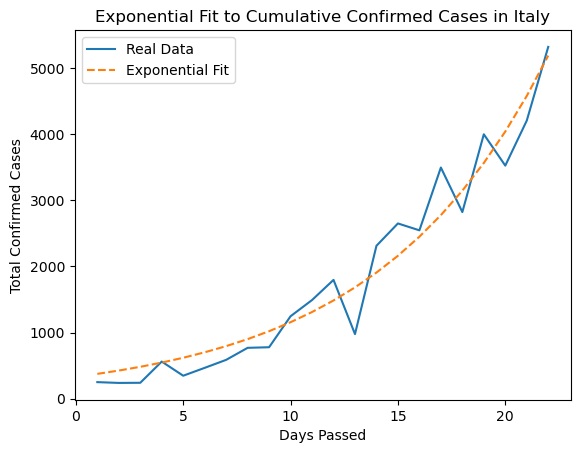

Difference between exponential curve and real cases on 2020-03-20: -131.26


In [101]:
# Filter data for Italy between 2020-02-28 and 2020-03-20
italy_data = df2[(df2['location'] == 'Italy') & (df2['date'] >= '2020-02-28') & (df2['date'] <= '2020-03-20')]

# Extract the relevant columns
days_passed = np.arange(1, len(italy_data) + 1)
total_confirmed_cases = italy_data['new_cases'].values

# Define the exponential function
def exponential_function(x, A, B):
    return A * np.exp(B * x)

# Fit the exponential function to the data
params, covariance = curve_fit(exponential_function, days_passed, total_confirmed_cases)

# Extract the fitted parameters
A, B = params

# Generate the fitted exponential curve
fitted_curve = exponential_function(days_passed, A, B)

# Plot the real data and the fitted curve
plt.plot(days_passed, total_confirmed_cases, label='Real Data')
plt.plot(days_passed, fitted_curve, label='Exponential Fit', linestyle='--')
plt.xlabel('Days Passed')
plt.ylabel('Total Confirmed Cases')
plt.title('Exponential Fit to Cumulative Confirmed Cases in Italy')
plt.legend()
plt.show()

# Calculate the difference between the exponential curve and the real cases on 2020-03-20
days_on_2020_03_20 = (pd.to_datetime('2020-03-20') - pd.to_datetime('2020-02-28')).days + 1
real_cases_on_2020_03_20 = total_confirmed_cases[days_on_2020_03_20 - 1]
fitted_cases_on_2020_03_20 = exponential_function(days_on_2020_03_20, A, B)
difference = fitted_cases_on_2020_03_20 - real_cases_on_2020_03_20

print(f"Difference between exponential curve and real cases on 2020-03-20: {difference:.2f}")


In [102]:
# Assuming you have a DataFrame named df with columns 'total_deaths' and 'population'
df2['death_rate'] = (df2['new_deaths'] / df2['population']) * 1e6  # Calculate death rate per million inhabitants

# Sort the DataFrame by death rate in descending order
df_sorted = df2.sort_values(by='death_rate', ascending=False)

# Get the country with the 3rd highest death rate
third_highest_death_rate_country = df_sorted.iloc[50]['location']

print("Country with the 3rd highest death rate:", third_highest_death_rate_country)


Country with the 3rd highest death rate: Belgium


In [103]:
# Filter out rows with missing information
df = df2.dropna(subset=['new_deaths', 'population', 'aged_65_older_percent'])

# Define a binary column indicating whether death rate is over 50 per million inhabitants
df['high_death_rate'] = (df2['new_deaths'] / (df['population'] / 1_000_000)) > 50

# Define a binary column indicating whether more than 20% of the population is over 65 years old
df['older_than_65'] = df2['aged_65_older_percent'] > 20

# Evaluate the F1 score
f1 = f1_score(df['older_than_65'], df['high_death_rate'])

print(f"F1 Score: {f1}")


F1 Score: 0.0


C:\Users\Owner\AppData\Local\Temp\ipykernel_51080\4079561265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_death_rate'] = (df2['new_deaths'] / (df['population'] / 1_000_000)) > 50
C:\Users\Owner\AppData\Local\Temp\ipykernel_51080\4079561265.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['older_than_65'] = df2['aged_65_older_percent'] > 20


In [104]:
# Filter out rows with missing information
df = df.dropna(subset=['new_deaths', 'population', 'aged_65_older_percent'])

# Define a binary column indicating whether death rate is over 50 per million inhabitants
df['high_death_rate'] = (df['new_deaths'] / (df['population'] / 1_000_000)) > 50

# Define a binary column indicating whether more than 20% of the population is over 65 years old
df['older_than_65'] = df['aged_65_older_percent'] > 20

# Evaluate the F1 score
f1 = f1_score(df['older_than_65'], df['high_death_rate'])

print(f"F1 Score: {f1}")


F1 Score: 0.0


In [105]:
# Filter out rows with missing information
df = df.dropna(subset=['gdp_per_capita', 'hospital_beds_per_thousand'])

# Event A: GDP over $10,000
event_A = df['gdp_per_capita'] > 10000

# Event B: at least 5 hospital beds per 1000 inhabitants
event_B = df['hospital_beds_per_thousand'] >= 5

# Calculate probabilities
prob_A_given_B = (event_A & event_B).sum() / event_B.sum()
print(f"Probability that a country has GDP over $10,000 given at least 5 hospital beds per 1000 inhabitants: {prob_A_given_B:.2%}")


Probability that a country has GDP over $10,000 given at least 5 hospital beds per 1000 inhabitants: 91.93%
